In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
faostat_df = pd.read_csv("FAOSTAT_data_en_11-19-2025.csv")   
crop_df    = pd.read_csv("Crop_recommendation.csv")          

print("FAOSTAT head:")
print(faostat_df.head())

print("\nCrop dataset head:")
print(crop_df.head())


FAOSTAT head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Ani

In [3]:
faostat_india = faostat_df[faostat_df["Area"] == "India"].copy()

print("FAOSTAT India head:")
print(faostat_india.head())
print("FAOSTAT India shape:", faostat_india.shape)


FAOSTAT India head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   


In [4]:
print("Before explosion shape:", faostat_india.shape)
print(faostat_india[["Item"]].head())

# split on comma and strip spaces
faostat_india["crop"] = (
    faostat_india["Item"]
      .str.split(",")
      .apply(lambda lst: [x.strip() for x in lst])
)

faostat_exploded = faostat_india.explode("crop").reset_index(drop=True)

print("\nAfter explosion shape:", faostat_exploded.shape)
print(faostat_exploded[["Item","crop"]].head())


Before explosion shape: (5940, 15)
                                                Item
0  Anise, badian, coriander, cumin, caraway, fenn...
1  Anise, badian, coriander, cumin, caraway, fenn...
2  Anise, badian, coriander, cumin, caraway, fenn...
3  Anise, badian, coriander, cumin, caraway, fenn...
4  Anise, badian, coriander, cumin, caraway, fenn...

After explosion shape: (9160, 16)
                                                Item       crop
0  Anise, badian, coriander, cumin, caraway, fenn...      Anise
1  Anise, badian, coriander, cumin, caraway, fenn...     badian
2  Anise, badian, coriander, cumin, caraway, fenn...  coriander
3  Anise, badian, coriander, cumin, caraway, fenn...      cumin
4  Anise, badian, coriander, cumin, caraway, fenn...    caraway


In [29]:
faostat_exploded = faostat_exploded.rename(columns={"Item": "item"})



crop_df = crop_df.rename(columns={"label": "crop"})

print("Crop columns after rename:", crop_df.columns)
print("FAOSTAT columns after rename:", faostat_exploded.columns)


Crop columns after rename: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop',
       'FAO_name'],
      dtype='object')
FAOSTAT columns after rename: Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'crop', 'FAO_name'],
      dtype='object')


In [6]:
label_to_fao = {
    "apple":      "Apples",
    "banana":     "Bananas",
    "chickpea":   "Chick peas",
    "coconut":    "Coconuts",
    "coffee":     "Coffee",
    "cotton":     "Seed cotton",
    "grapes":     "Grapes",
    "jute":       "Jute",
    "lentil":     "Lentils",
    "maize":      "Maize (corn)",
    "mango":      "Mangoes",
    "mothbeans":  "Beans",
    "muskmelon":  "Cantaloupes and other melons",
    "orange":     "Oranges",
    "papaya":     "Papayas",
    "pigeonpeas": "Pigeon peas",
    "rice":       "Rice",
    "watermelon": "Watermelons",
}


In [7]:
crop_df["FAO_name"] = crop_df["crop"].map(label_to_fao)

faostat_exploded["FAO_name"] = faostat_exploded["crop"]


crop_mapped = crop_df[~crop_df["FAO_name"].isna()].copy()

merged = faostat_exploded.merge(
    crop_mapped,
    on="FAO_name",
    how="inner",
    suffixes=("_fao", "_ml")
)

print("Merged shape:", merged.shape)
print("Unique ML crops after mapping:", merged["crop_ml"].nunique())
print(sorted(merged["crop_ml"].unique()))


Merged shape: (129600, 25)
Unique ML crops after mapping: 18
['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']


In [8]:
merged["crop"] = merged["crop_ml"]


In [18]:
print("Unique crops in final_df:")
print(sorted(final_df["crop"].unique()))
print("Number of unique crops:", final_df["crop"].nunique())


Unique crops in final_df:
['banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'watermelon']
Number of unique crops: 15


In [9]:
cols_keep = [
    "Element", "Value",          # from FAOSTAT
    "N", "P", "K",
    "temperature", "humidity", "ph", "rainfall",
    "crop"
]

final_df = merged[cols_keep].copy()

print("final_df shape:", final_df.shape)
print(final_df.head())
print(final_df.tail())


final_df shape: (129600, 10)
          Element     Value   N    P    K  temperature   humidity        ph  \
0  Area harvested  230000.0  24  128  196    22.750888  90.694892  5.521467   
1  Area harvested  230000.0   7  144  197    23.849401  94.348150  6.133221   
2  Area harvested  230000.0  14  128  205    22.608010  94.589006  6.226290   
3  Area harvested  230000.0   8  120  201    21.186674  91.134357  6.321152   
4  Area harvested  230000.0  20  129  201    23.410447  91.699133  5.587906   

     rainfall   crop  
0  110.431786  apple  
1  114.051249  apple  
2  116.039659  apple  
3  122.233323  apple  
4  116.077793  apple  
           Element      Value    N   P   K  temperature   humidity        ph  \
129595  Production  3626000.0   97  12  47    25.287846  89.636679  6.765095   
129596  Production  3626000.0  110   7  45    26.638386  84.695469  6.189214   
129597  Production  3626000.0   96  18  50    25.331045  84.305338  6.904242   
129598  Production  3626000.0   83  23

In [30]:

final_df = merged[cols_keep].copy()

print("final_df shape:", final_df.shape)
print(final_df.head())
print(final_df.tail())

# Check unique crops
print("Unique crops in final_df:")
print(sorted(final_df["crop"].unique()))
print("Number of unique crops:", final_df["crop"].nunique())


final_df shape: (129600, 10)
          Element     Value   N    P    K  temperature   humidity        ph  \
0  Area harvested  230000.0  24  128  196    22.750888  90.694892  5.521467   
1  Area harvested  230000.0   7  144  197    23.849401  94.348150  6.133221   
2  Area harvested  230000.0  14  128  205    22.608010  94.589006  6.226290   
3  Area harvested  230000.0   8  120  201    21.186674  91.134357  6.321152   
4  Area harvested  230000.0  20  129  201    23.410447  91.699133  5.587906   

     rainfall   crop  
0  110.431786  apple  
1  114.051249  apple  
2  116.039659  apple  
3  122.233323  apple  
4  116.077793  apple  
           Element      Value    N   P   K  temperature   humidity        ph  \
129595  Production  3626000.0   97  12  47    25.287846  89.636679  6.765095   
129596  Production  3626000.0  110   7  45    26.638386  84.695469  6.189214   
129597  Production  3626000.0   96  18  50    25.331045  84.305338  6.904242   
129598  Production  3626000.0   83  23

In [22]:
print("Null counts:")
print(final_df.isna().sum())


Null counts:
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64


In [23]:
print("Duplicate rows:", final_df.duplicated().sum())
final_df = final_df.drop_duplicates().reset_index(drop=True)
print("Shape after dropping duplicates:", final_df.shape)


Duplicate rows: 2600
Shape after dropping duplicates: (127000, 10)


In [24]:
numeric_cols = ["Value","N","P","K",
                "temperature","humidity","ph","rainfall"]

for col in numeric_cols:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    final_df = final_df[(final_df[col] >= low) & (final_df[col] <= high)]

print("Shape after outlier removal:", final_df.shape)


Shape after outlier removal: (85025, 10)


In [25]:
final_df.to_csv("Clean_FAOSTAT_Crop_18crops.csv", index=False)


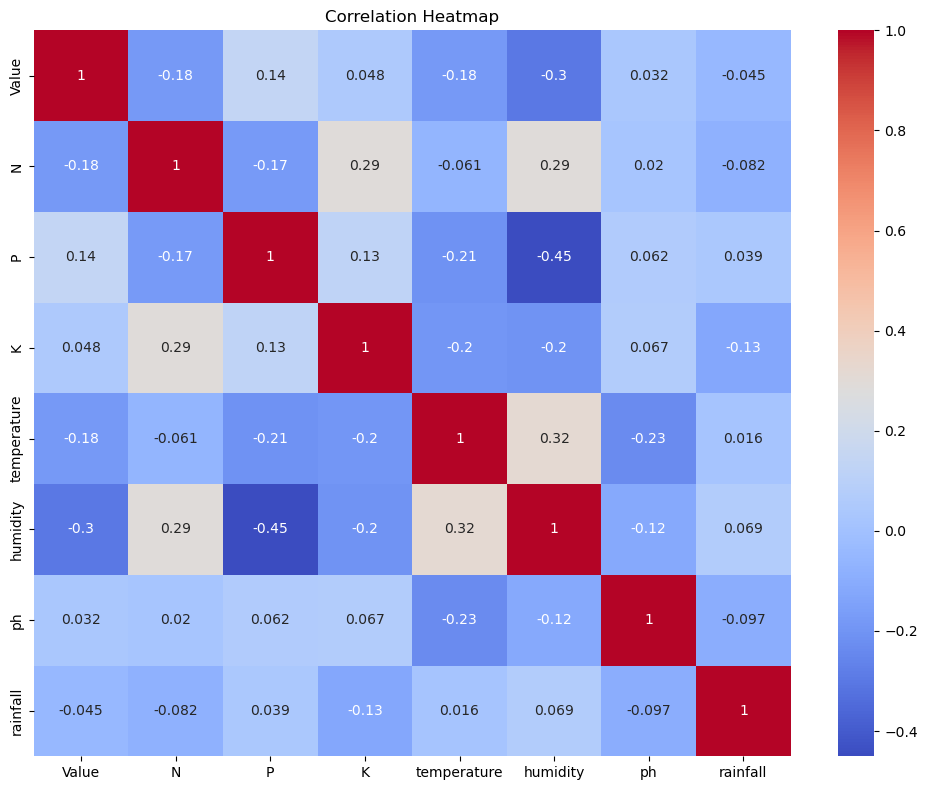

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


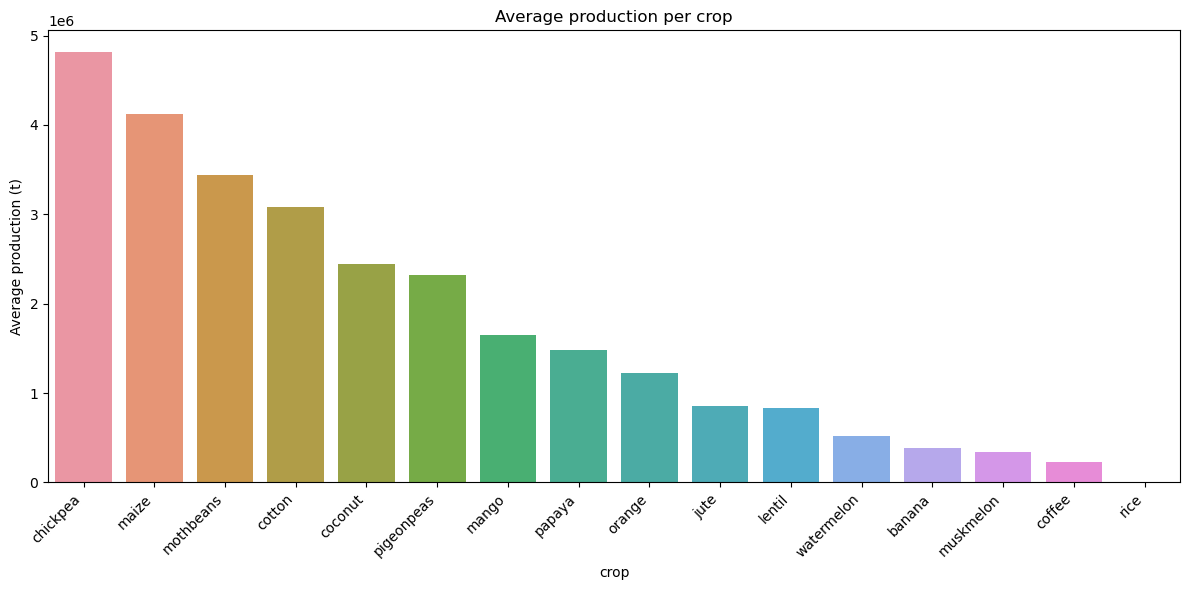

In [27]:
plt.figure(figsize=(12,6))
mean_prod = final_df.groupby("crop")["Value"].mean().sort_values(ascending=False)
sns.barplot(x=mean_prod.index, y=mean_prod.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average production (t)")
plt.title("Average production per crop")
plt.tight_layout()
plt.show()


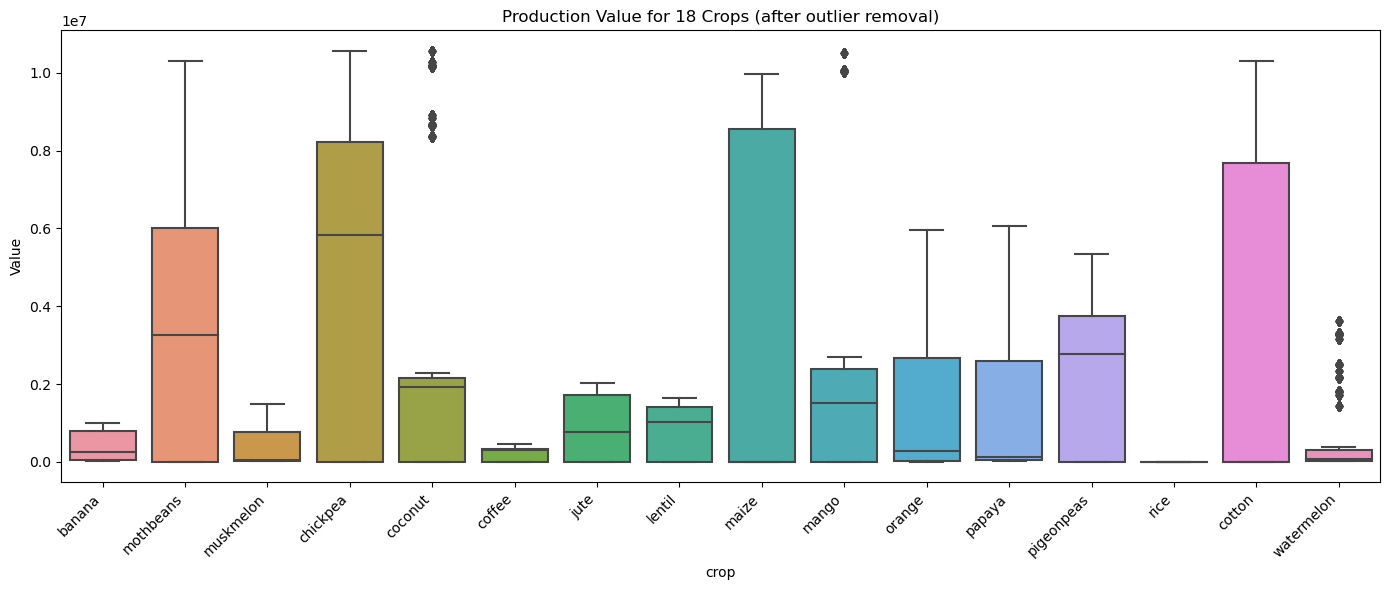

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(data=final_df, x="crop", y="Value")
plt.xticks(rotation=45, ha="right")
plt.title("Production Value for 18 Crops (after outlier removal)")
plt.tight_layout()
plt.show()
